# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the file

In [56]:
df=pd.read_csv(r"C:\Users\dhruv\Downloads\A.csv")

In [57]:
df.head()

,Sex,Length,Diameter,Height,Wweight,Sweight,Vweight,ssweight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Checking null values using heatmap

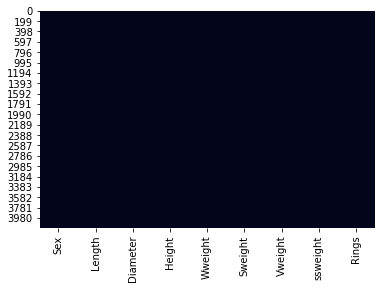

In [5]:
sns.heatmap(df.isnull(),cbar=False)

In [6]:
df.isnull().sum()

Sex         0
Length      0
Diameter    0
Height      0
Wweight     0
Sweight     0
Vweight     0
ssweight    0
Rings       0
dtype: int64

# Sex column is categorical so converting it to dummy variables

In [58]:
df=pd.get_dummies(df, columns=['Sex'])

In [59]:
df.head()

,Length,Diameter,Height,Wweight,Sweight,Vweight,ssweight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


# Rearranging the columns

In [60]:
cols = ['Length', 'Diameter', 'Height', 'Wweight', 'Sweight', 'Vweight',
       'ssweight',  'Sex_F', 'Sex_I', 'Sex_M','Rings']


In [61]:
df=df[cols]
df.head()

,Length,Diameter,Height,Wweight,Sweight,Vweight,ssweight,Sex_F,Sex_I,Sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,7


# Plotting correlation map

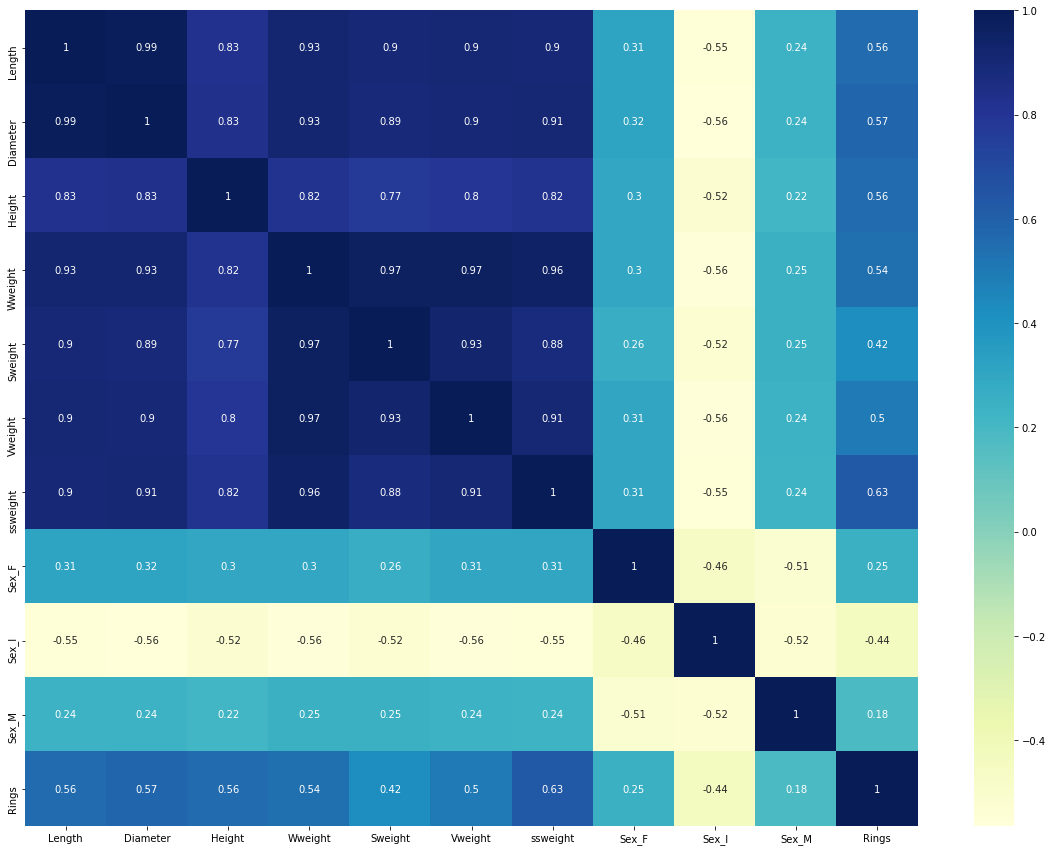

In [51]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

# Linear Regression model using all features

In [62]:
x=df.iloc[:,0:10]
y=df.iloc[:,10]



In [63]:
mod1=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
mod1.fit(x_train,y_train)
y_pred=mod1.predict(x_test)
print(r2_score(y_test,y_pred))

0.5196233420241054


# Simple linear regression using individual columns

In [109]:
for i in cols:
    x=df[[i]]
    y=df["Rings"]
    mod2=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
    mod1.fit(x_train,y_train)
    y_pred=mod1.predict(x_test)
    print(r2_score(y_test,y_pred))

0.29142852487774384
0.3071759495492019
0.32762020145173243
0.26602690193175704
0.1557374652866933
0.22957080782569905
0.37135631129710067


# Checking Skew of the target variable

Text(0.5, 1.0, 'Rings')

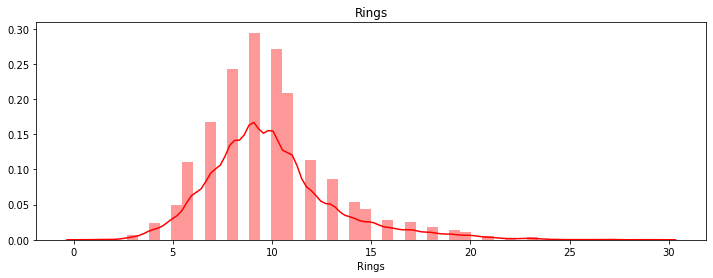

In [103]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(111)
sns.distplot(df['Rings'],bins=50,color='r',ax=ax)
ax.set_title('Rings')



# Standardizing the Rings column 

In [64]:
from sklearn.preprocessing import StandardScaler
r_scaler= StandardScaler()
df["Rings"]=r_scaler.fit_transform(df[["Rings"]])
df.head()

,Length,Diameter,Height,Wweight,Sweight,Vweight,ssweight,Sex_F,Sex_I,Sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,1.571544
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,-0.910013
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,-0.289624
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,0.020571
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,-0.910013


In [65]:
x=df.iloc[:,0:10]
y=df.iloc[:,10]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


# Finding out the important features

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train, y_train)
feature_importances = regressor.feature_importances_

x_train_opt = x_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(x_train_opt.pop(x_train_opt.columns[least_important]))
    regressor.fit(x_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = x_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(x_train_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()


,Features,r2 Score
0,"Length, Diameter, Height, Wweight, Sweight, Vw...",0.531982
1,"Length, Diameter, Height, Wweight, Sweight, Vw...",0.532287
2,"Length, Diameter, Height, Wweight, Sweight, Vw...",0.521364
3,"Diameter, Height, Wweight, Sweight, Vweight, s...",0.518846
4,"Diameter, Wweight, Sweight, Vweight, ssweight",0.517472


In [27]:
feature_selection.Features[1]

'Length, Diameter, Height, Wweight, Sweight, Vweight, ssweight, Sex_I'

# Using f_regression function for getting the correlation statistics

In [34]:
from sklearn.feature_selection import f_regression
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)



Feature 0: 1357.967835
Feature 1: 1501.207051
Feature 2: 1271.408935
Feature 3: 1266.211254
Feature 4: 665.591082
Feature 5: 1044.694622
Feature 6: 1970.334950
Feature 7: 182.304810
Feature 8: 669.922895
Feature 9: 106.204006


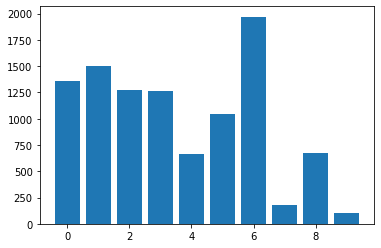

In [35]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [66]:
x=df[['Length', 'Diameter', 'Height', 'Wweight', 'Sweight', 'Vweight', 'ssweight', 'Sex_I']]
y=df["Rings"]
mod1=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
mod1.fit(x_train,y_train)
y_pred=mod1.predict(x_test)
print(r2_score(y_test,y_pred))

0.5206320311272488


# Boxplots

In [67]:
def outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
 

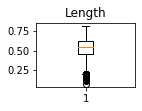

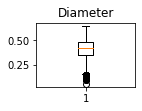

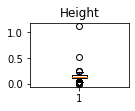

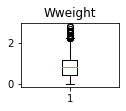

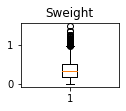

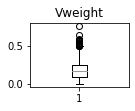

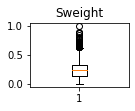

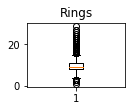

In [46]:
plt.subplot(3,3,1)
plt.boxplot(df["Length"])
plt.title("Length")
plt.show()
plt.subplot(3,3,2)
plt.boxplot(df['Diameter'])
plt.title('Diameter')
plt.show()
plt.subplot(3,3,3)
plt.boxplot(df['Height'])
plt.title('Height')
plt.show()
plt.subplot(3,3,4)
plt.boxplot(df['Wweight'])
plt.title('Wweight')
plt.show()
plt.subplot(3,3,5)
plt.boxplot(df['Sweight'])
plt.title('Sweight')
plt.show()
plt.subplot(3,3,6)
plt.boxplot(df['Vweight'])
plt.title('Vweight')
plt.show()
plt.subplot(3,3,7)
plt.boxplot(df['ssweight'])
plt.title('Ssweight')
plt.show()
plt.subplot(3,3,8)
plt.boxplot(df['Rings'])
plt.title('Rings')
plt.show()

In [104]:
cols=['Length', 'Diameter', 'Height', 'Wweight', 'Sweight', 'Vweight','ssweight']
for i in cols:
    lb,ub= outlier(df[i])
    print(df[df[i]< lb].shape,df[df[i]>ub].shape)

(49, 11) (0, 11)
(59, 11) (0, 11)
(24, 11) (5, 11)
(0, 11) (30, 11)
(0, 11) (48, 11)
(0, 11) (26, 11)
(0, 11) (35, 11)


In [68]:
pf=df.copy()
pf.head()

,Length,Diameter,Height,Wweight,Sweight,Vweight,ssweight,Sex_F,Sex_I,Sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,1.571544
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,-0.910013
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,-0.289624
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,0.020571
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,-0.910013


In [69]:
col=["ssweight","Height","Length",'Diameter','Wweight', 'Sweight', 'Vweight']
for i in col:
    lowerbound,upperbound = outlier(pf[i])
    pf.drop(pf[ (pf[i] > upperbound) | (pf[i] < lowerbound) ].index , inplace=True)
    x=pf[['Length', 'Diameter', 'Height', 'Wweight', 'Sweight', 'Vweight', 'ssweight', 'Sex_I']]
    y=pf["Rings"]
    mod1=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
    mod1.fit(x_train,y_train)
    y_pred=mod1.predict(x_test)
    print(r2_score(y_test,y_pred))

0.4875701519914746
0.5440424827987747
0.5275935706535708
0.5093851546976024
0.5387135631865025
0.526784970840531
0.5335793090233403


### So dropping outliers of only ssweight and Height give us the highest score

In [70]:
c=['ssweight','Height']
for i in c:
    lb,ub= outlier(df[i])
    df.drop(df[ (df[i] > ub) | (df[i] < lb) ].index , inplace=True)



In [92]:
x=df[['Length', 'Diameter', 'Height', 'Wweight', 'Sweight', 'Vweight', 'ssweight', 'Sex_I']]
y=df["Rings"]
modx=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
modx.fit(x_train,y_train)
y_pred=modx.predict(x_test)
result_mlr=r2_score(y_test,y_pred)
result_mlr  

0.5440424827987747

## This is the highest accuracy we can get for Linear Regression

# Polynomial Regression:

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
x=df[['Length', 'Diameter', 'Height', 'Wweight', 'Sweight', 'Vweight', 'ssweight', 'Sex_I']]
y=df["Rings"]




In [76]:
for i in range(2,7):
    x1 = PolynomialFeatures(degree=i, include_bias=False).fit_transform(x)
    model = LinearRegression().fit(x1, y)
    y_pred = lin_reg_2.predict(X_poly)
    fin = model.score(x1,y)
    print(fin)
   
    

0.5800939689135307
0.6060612689465403
0.6666247687750664
0.7509596942263521
0.8853391655945764


# Model has started to overfit after degree 5

In [95]:

x1 = PolynomialFeatures(degree=4, include_bias=False).fit_transform(x)
model = LinearRegression().fit(x1, y)
y_pred = lin_reg_2.predict(X_poly)
fin = model.score(x1,y)
print(fin)
   
   

0.6666247687750664


# Random forest regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor 
yo=[50,100,150,200]

for i in yo:
    regressor = RandomForestRegressor(n_estimators = i, random_state = 0) 
    regressor.fit(x_train, y_train)   
    rf_pred = regressor.predict(x_test)
    result_rf=r2_score(y_test,rf_pred)
    print(result_rf)

0.5479077923790605
0.5545563257988377
0.5540677240816363
0.5535298916350888


# So we select 100 trees

In [80]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(x_train, y_train)   
rf_pred = regressor.predict(x_test)
result_rf=r2_score(y_test,rf_pred)
print(result_rf)

0.5545563257988377


# ADABOOST Regressor

In [81]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [141]:
ada=AdaBoostRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [142]:
search.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 2000, 'random_state': 1}

In [82]:
ada2=AdaBoostRegressor(learning_rate= 0.001, n_estimators= 2000, random_state=1)

In [83]:
ada2.fit(x_train,y_train)
ab_pred=ada2.predict(x_test)
result_ab=r2_score(y_test,ab_pred)
result_ab

0.4627617284459876

# Gradient Boosting Regressor

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

In [165]:
gbr=GradientBoostingRegressor()
search_grid={'n_estimators':[50,100,200,250],'learning_rate':[.001,0.01,.1,1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [166]:
search.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 250, 'random_state': 1}

In [85]:
#these parameters have been taken with the help of net
gbr_mod=GradientBoostingRegressor(n_estimators=250,max_depth=3,learning_rate=0.1,criterion='mse',random_state=1)
gbr_mod.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
gb_pred=gbr_mod.predict(x_test)
result_gb=r2_score(y_test,gb_pred)
result_gb

0.5609907082167646

# XGBoost Regressor

In [17]:
import xgboost as xgb

In [87]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 1000)

In [88]:
xg_reg.fit(x_train,y_train)
xgb_pred = xg_reg.predict(x_test)
result_xgb=r2_score(y_test,xgb_pred)
result_xgb

[22:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


0.5739532872638913

In [96]:
models=pd.DataFrame({
"Model name": ["Mulitple LR","Polynomial","Random Forest","Ada Boost","Gradient Boost","XGBoost"],
"Final Scores": [result_mlr,fin,result_rf,result_ab,result_gb,result_xgb]
})

In [97]:
models

,Model name,Final Scores
0,Mulitple LR,0.544042
1,Polynomial,0.666625
2,Random Forest,0.554556
3,Ada Boost,0.462762
4,Gradient Boost,0.560991
5,XGBoost,0.573953


# So Polynomial Regression is best fit for the model